In [110]:
import requests
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [48]:


url = "https://raider.io/api/v1/guilds/profile?access_key=RIORcaTkJx1kUf9ETAAs2o3i8&region=us&realm=Ragnaros&name=Chifrijo%20Raiders&fields=members"

payload = {}
headers = {}

responseGuild = requests.request("GET", url, headers=headers, data=payload)

print(responseGuild.text)




{"name":"Chifrijo Raiders","faction":"horde","region":"us","realm":"Ragnaros","last_crawled_at":"2025-05-10T09:54:40.000Z","profile_url":"https://raider.io/guilds/us/ragnaros/Chifrijo%20Raiders","members":[{"rank":99,"character":{"name":"Klaymore","race":"Blood Elf","class":"Rogue","active_spec_name":"Assassination","active_spec_role":"DPS","gender":"female","faction":"horde","achievement_points":23105,"region":"us","realm":"Ragnaros","last_crawled_at":"2025-05-13T04:44:48.000Z","profile_url":"https://raider.io/characters/us/ragnaros/Klaymore","profile_banner":"hordebanner1"}},{"rank":3,"character":{"name":"Loah","race":"Zandalari Troll","class":"Hunter","active_spec_name":"Marksmanship","active_spec_role":"DPS","gender":"female","faction":"horde","achievement_points":17650,"region":"us","realm":"Ragnaros","last_crawled_at":"2025-05-13T03:52:42.000Z","profile_url":"https://raider.io/characters/us/ragnaros/Loah","profile_banner":"hordebanner1"}},{"rank":5,"character":{"name":"Gilliana",

In [49]:


datajson = json.loads( responseGuild.text)

print(datajson['members'])

[{'rank': 99, 'character': {'name': 'Klaymore', 'race': 'Blood Elf', 'class': 'Rogue', 'active_spec_name': 'Assassination', 'active_spec_role': 'DPS', 'gender': 'female', 'faction': 'horde', 'achievement_points': 23105, 'region': 'us', 'realm': 'Ragnaros', 'last_crawled_at': '2025-05-13T04:44:48.000Z', 'profile_url': 'https://raider.io/characters/us/ragnaros/Klaymore', 'profile_banner': 'hordebanner1'}}, {'rank': 3, 'character': {'name': 'Loah', 'race': 'Zandalari Troll', 'class': 'Hunter', 'active_spec_name': 'Marksmanship', 'active_spec_role': 'DPS', 'gender': 'female', 'faction': 'horde', 'achievement_points': 17650, 'region': 'us', 'realm': 'Ragnaros', 'last_crawled_at': '2025-05-13T03:52:42.000Z', 'profile_url': 'https://raider.io/characters/us/ragnaros/Loah', 'profile_banner': 'hordebanner1'}}, {'rank': 5, 'character': {'name': 'Gilliana', 'race': "Mag'har Orc", 'class': 'Monk', 'active_spec_name': 'Mistweaver', 'active_spec_role': 'HEALING', 'gender': 'female', 'faction': 'horde

In [50]:



# Supongamos que ya hiciste tu request
# response = requests.get("https://api.raider.io/...") 
# data = response.json()

# Reemplazo por tu JSON real para este ejemplo
data = datajson


memebers = data['members']


df = pd.DataFrame([
    {
        "Nombre": m['character']['name'],
        "Rank": '',
        "Date": ''
    }
    for m in data['members']
])

# Mostrar el DataFrame
print(df)


          Nombre Rank Date
0       Klaymore          
1           Loah          
2       Gilliana          
3           Mâle          
4        Pakural          
..           ...  ...  ...
85  Deathinvasor          
86       Airflow          
87    Drakonicus          
88        Prolex          
89        Hliina          

[90 rows x 3 columns]


In [102]:
def get_rank(name, realm):
    import requests
    import json





    url = f"""https://raider.io/api/v1/characters/profile?access_key=RIORcaTkJx1kUf9ETAAs2o3i8&region=us&realm={realm}&name={name}&fields=mythic_plus_scores_by_season%3Aseason-tww-2"""
    
    payload = {}
    headers = {
    'accept': 'application/json'
    }

    response = requests.request("GET", url, headers=headers, data=payload)

    response_json = json.loads(response.text)

    #print(response_json['mythic_plus_ranks']['overall']['region'])
    return response_json['mythic_plus_scores_by_season'][0]['scores']['all']

In [55]:
def get_last_active_time(name, realm):
    import requests
    import json





    url = f"""https://raider.io/api/v1/characters/profile?access_key=RIORcaTkJx1kUf9ETAAs2o3i8&region=us&realm={realm}&name={name}&fields=mythic_plus_recent_runs"""

    payload = {}
    headers = {
    'accept': 'application/json'
    }

    response = requests.request("GET", url, headers=headers, data=payload)

    response_json = json.loads(response.text)

    #print(response_json['mythic_plus_recent_runs'][0]['completed_at'])
    return response_json['mythic_plus_recent_runs'][0]['completed_at']

In [103]:
ListFinal = []

In [104]:
fistDay = datetime.datetime.strptime("2025-05-10", "%Y-%m-%d").strftime("%d/%m/%Y")
lastDay = datetime.datetime.strptime("2025-05-20", "%Y-%m-%d").strftime("%d/%m/%Y")

if responseGuild.status_code == 200:
    json_data = responseGuild.json()  # Aquí se deserializa el JSON automáticamente
    usuarios = memebers

    for usuario in usuarios:
        #print(f"Nombre: {usuario['character']['name']}, Realm: {usuario['character']['realm']}")
        rank = get_rank(usuario['character']['name'], usuario['character']['realm'])
        if rank != 0:
            last_active = get_last_active_time(usuario['character']['name'], usuario['character']['realm'])
            last_active_formated = datetime.datetime.strptime(last_active, "%Y-%m-%dT%H:%M:%S.%fZ").strftime("%d/%m/%Y")
            if datetime.datetime.strptime (last_active_formated,"%d/%m/%Y") > datetime.datetime.strptime (fistDay,"%d/%m/%Y") and datetime.datetime.strptime (last_active_formated,"%d/%m/%Y") < datetime.datetime.strptime (lastDay,"%d/%m/%Y"):
                ListFinal.append({
                    'Nombre': usuario['character']['name'],
                    'Rank': rank,
                    'Date': last_active_formated
                })
else:
    print(f"Error {responseGuild.status_code}: {responseGuild.text}")

In [116]:
dfListFinal = pd.DataFrame(ListFinal)
# Parsear el string a un objeto datetime
#fecha_obj = datetime.strptime(fecha_iso, "%Y-%m-%dT%H:%M:%S.%fZ")

# Formatear solo día, mes y año
#fecha_formateada = fecha_obj.strftime("%d/%m/%Y")
#dfListFinal['Date'] = dfListFinal['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ").strftime("%d/%m/%Y"))

In [117]:
dfListFinal.sort_values(by='Rank', ascending=False, inplace=True)

In [119]:
df_sorted = dfListFinal

In [123]:
df_sorted.to_csv('output.csv', index=False)

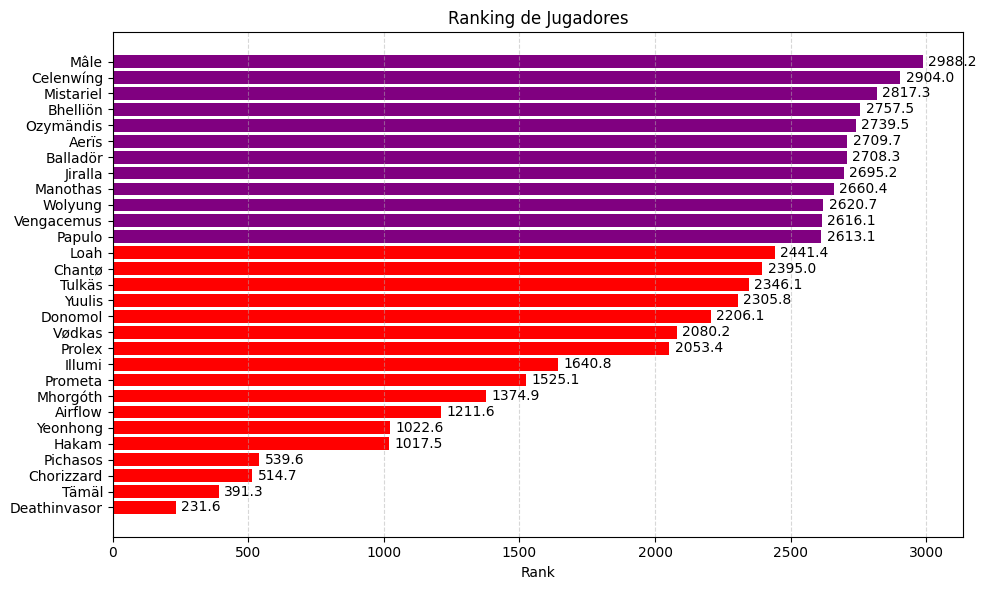

In [120]:
# Definir colores según condición del valor de Rank
colores = ['purple' if valor > 2500 else 'red' for valor in df_sorted["Rank"]]

# Crear gráfico con color condicional
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted["Nombre"], df_sorted["Rank"], color=colores)
plt.gca().invert_yaxis()
plt.title("Ranking de Jugadores")
plt.xlabel("Rank")
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Agregar etiquetas de valor
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height() / 2, f"{width:.1f}", va='center')

plt.tight_layout()
plt.show()